# Implementation

In [1]:
# Import all modules
import random
import pylab
import pickle as pkl
from PIL import Image
import numpy as np
import pandas as pd
from lasagne import layers
from theano.tensor.nnet import softmax
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import BatchIterator

Using gpu device 0: GeForce GT 740M (CNMeM is disabled)


In [2]:
# Load train and test set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

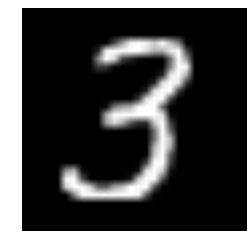

In [6]:
# Visualizing Training Dataset
%matplotlib inline
import random
i = random.randrange(0, 42000)
img = np.asarray(train.ix[i, 1:])
img = img.reshape(28, 28)
pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()

#print "-----------------------------"
#print train.head(5)
#print "-----------------------------"
#print train.count()

In [10]:
# Preprocessing step
# Normalizing image
train_labels = train.ix[:, 0].values.astype(np.int32)
train_images = train.ix[:, 1:].values.astype(np.float32)
train_images /= train_images.std(axis = None)
train_images -= train_images.mean()

test_images = test.values.astype(np.float32)
test_images /= test_images.std(axis = None)
test_images -= test_images.mean()

In [11]:
# Setting architecture of NN
net = NeuralNet(
        layers = [
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('dropout2', layers.DropoutLayer),
            ('hidden3', layers.DenseLayer),
            ('output', layers.DenseLayer),
        ],
    
        input_shape = (None, 1, 28, 28),
        conv1_num_filters = 32, conv1_filter_size = (3, 3),
        pool1_pool_size = (2, 2),
        dropout1_p = 0.2,
        conv2_num_filters = 32, conv2_filter_size = (3, 3),
        pool2_pool_size = (2, 2),
        dropout2_p = 0.2,
        hidden3_num_units = 32,
        output_num_units = 10, output_nonlinearity = softmax,
    
        batch_iterator_train = BatchIterator(batch_size = 150),
        batch_iterator_test = BatchIterator(batch_size = 150),
    
        update_learning_rate = 0.01,
        update_momentum = 0.9,
    
        use_label_encoder = True,
        regression = False,
        max_epochs = 10,
        verbose = 1,
    )

In [12]:
# Reshape dataset to fit to NN
X = train_images.reshape(-1, 1, 28, 28)
y = train_labels

test_x = test_images.reshape(-1, 1, 28, 28)

In [13]:
# Train NN
net.fit(X, y)

# Neural Network with 35530 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv1     32x26x26
  2  pool1     32x13x13
  3  dropout1  32x13x13
  4  conv2     32x11x11
  5  pool2     32x5x5
  6  dropout2  32x5x5
  7  hidden3   32
  8  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.55397       0.14749      3.75598      0.95684  15.76s
      2       0.15068       0.10081      1.49478      0.96819  15.69s
      3       0.11031       0.08234      1.33966      0.97345  15.70s
      4       0.09086       0.07612      1.19361      0.97509  16.05s
      5       0.07868       0.06575      1.19667      0.97778  15.66s
      6       0.07038       0.05843      1.20442      0.98082  15.66s
      7       0.06395       0.05584      1.14527      0.98175  15.66s
      8       0.05801       0.05387      1.07675      0.9

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fa08ca7b110>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fa08ca7b510>,
     conv1_filter_size=(3, 3), conv1_num_filters=32,
     conv2_filter_size=(3, 3), conv2_num_filters=32, custom_score=None,
     dropout1_p=0.2, dropout2_p=0.2, hidden3_num_units=32,
     input_shape=(None, 1, 28, 28),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <cla..., <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x7fa08d2376e0>,
     objective_loss_function=<function categorical_crossentro

In [14]:
# Saving model
import pickle as pkl
f = open('/home/faizy/model.pkl', 'wb')
pkl.dump(net, f)

In [15]:
# Output prediction
f = open('/home/faizy/model.pkl', 'rb')
netter = pkl.load(f)
pred = netter.predict(test_x)

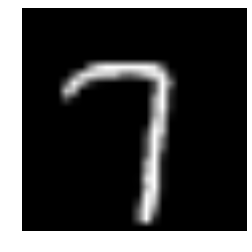

--------------
PREDICTION:  7


In [18]:
# Visualizing output
%matplotlib inline
import random
i = random.randrange(0, 28000)
img = np.asarray(test.ix[i])
img = img.reshape(28, 28)
pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()
print '--------------'
print 'PREDICTION: ', pred[i]